In [2]:
from pprint import pprint
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from matplotlib import pyplot
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix


In [3]:
df = pd.read_csv("adult-2.csv")

In [4]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [5]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
df.drop(["fnlwgt", "capital.gain", "capital.loss"], axis=1)

,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,hours.per.week,native.country,income
0,90,?,HS-grad,9,Widowed,?,Not-in-family,White,Female,40,United-States,<=50K
1,82,Private,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,18,United-States,<=50K
2,66,?,Some-college,10,Widowed,?,Unmarried,Black,Female,40,United-States,<=50K
3,54,Private,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,40,United-States,<=50K
4,41,Private,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,40,United-States,<=50K
32557,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K
32558,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K
32559,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K


In [7]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [8]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [9]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [10]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [11]:
df._get_numeric_data().columns

Index(['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss',
       'hours.per.week'],
      dtype='object')

In [12]:
categorical_columns = list(set(df.columns) - set(df._get_numeric_data().columns))
categorical_columns

['occupation',
 'native.country',
 'workclass',
 'education',
 'marital.status',
 'sex',
 'relationship',
 'income',
 'race']

In [13]:
df['occupation'].unique().tolist()

['?',
 'Exec-managerial',
 'Machine-op-inspct',
 'Prof-specialty',
 'Other-service',
 'Adm-clerical',
 'Craft-repair',
 'Transport-moving',
 'Handlers-cleaners',
 'Sales',
 'Farming-fishing',
 'Tech-support',
 'Protective-serv',
 'Armed-Forces',
 'Priv-house-serv']

In [14]:
uniques_columns = {}
for col in categorical_columns:
    uniques_columns[col] = df[col].unique().tolist()
uniques_columns

{'occupation': ['?',
  'Exec-managerial',
  'Machine-op-inspct',
  'Prof-specialty',
  'Other-service',
  'Adm-clerical',
  'Craft-repair',
  'Transport-moving',
  'Handlers-cleaners',
  'Sales',
  'Farming-fishing',
  'Tech-support',
  'Protective-serv',
  'Armed-Forces',
  'Priv-house-serv'],
 'native.country': ['United-States',
  '?',
  'Mexico',
  'Greece',
  'Vietnam',
  'China',
  'Taiwan',
  'India',
  'Philippines',
  'Trinadad&Tobago',
  'Canada',
  'South',
  'Holand-Netherlands',
  'Puerto-Rico',
  'Poland',
  'Iran',
  'England',
  'Germany',
  'Italy',
  'Japan',
  'Hong',
  'Honduras',
  'Cuba',
  'Ireland',
  'Cambodia',
  'Peru',
  'Nicaragua',
  'Dominican-Republic',
  'Haiti',
  'El-Salvador',
  'Hungary',
  'Columbia',
  'Guatemala',
  'Jamaica',
  'Ecuador',
  'France',
  'Yugoslavia',
  'Scotland',
  'Portugal',
  'Laos',
  'Thailand',
  'Outlying-US(Guam-USVI-etc)'],
 'workclass': ['?',
  'Private',
  'State-gov',
  'Federal-gov',
  'Self-emp-not-inc',
  'Self-emp

In [19]:
miss = dict(zip(categorical_columns, [0] * len(categorical_columns)))
miss

{'occupation': 0,
 'native.country': 0,
 'workclass': 0,
 'education': 0,
 'marital.status': 0,
 'sex': 0,
 'relationship': 0,
 'income': 0,
 'race': 0}

In [23]:
for c in miss:
    miss[c] = len(df[df[c] == '?'])
miss

{'occupation': 1843,
 'native.country': 583,
 'workclass': 1836,
 'education': 0,
 'marital.status': 0,
 'sex': 0,
 'relationship': 0,
 'income': 0,
 'race': 0}

In [29]:
df[df['occupation'] == '?'].index

Int64Index([    0,     2,    14,    24,    44,    48,    49,    76,   114,
              133,
            ...
            32440, 32483, 32496, 32500, 32528, 32533, 32534, 32541, 32543,
            32544],
           dtype='int64', length=1843)

In [24]:
len(df)

32561

In [30]:
for c in miss:
    df.drop(df[df[c] == '?'].index, inplace=True)
len(df)

30162

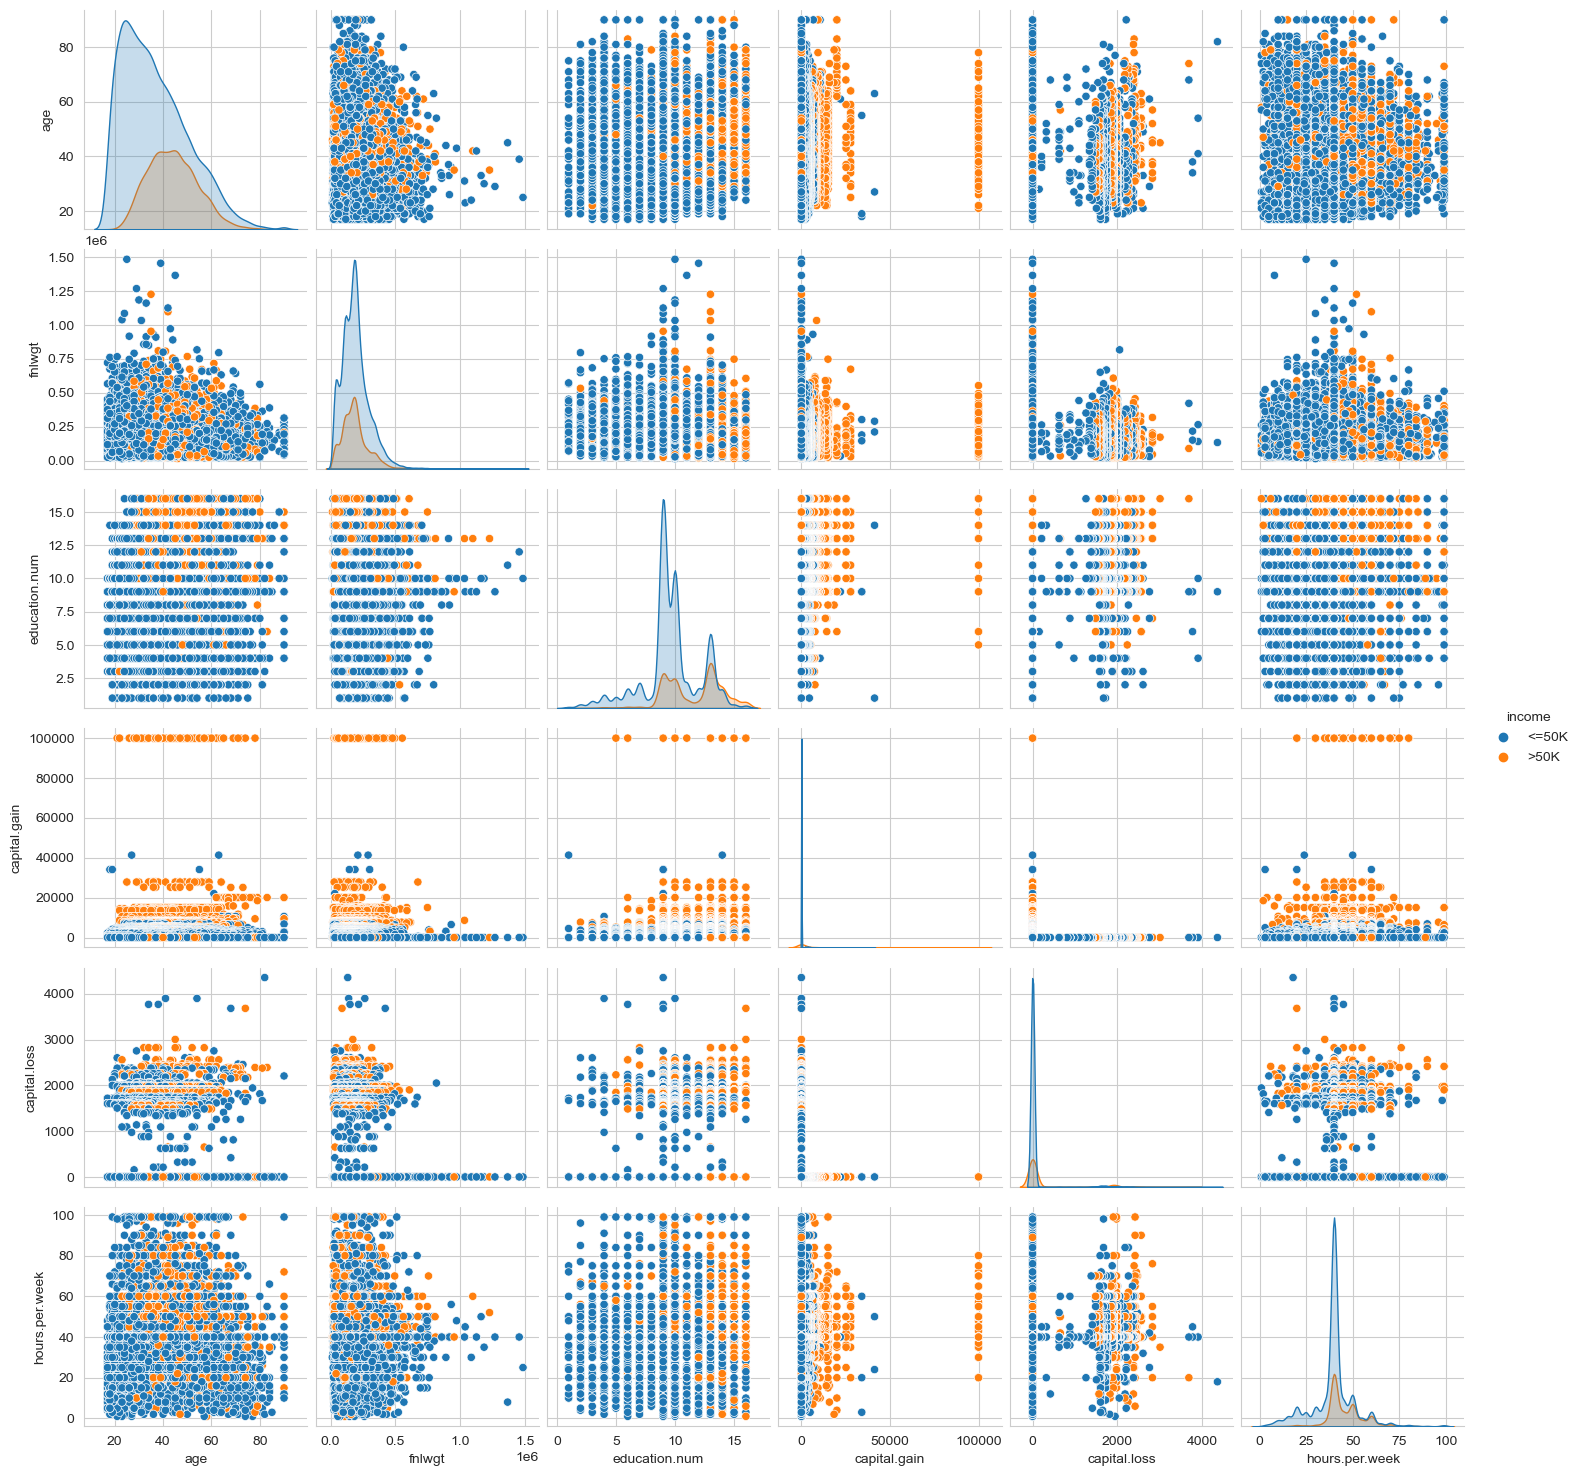

In [31]:
sns.pairplot(df, hue='income')

In [97]:
class NaiveBayes():
    def __init__(self, data, target, cont_cols = [] ):
        self.target_probabilities = None
        self.probs = None
        self.df_test = None
        self.df_train = None
        self.data = data
        self.target = target
        self.cont_cols = cont_cols if len(cont_cols) > 0 else self.data._get_numeric_data().columns
        self.maximum = {}
        self.minimum = {}

    def train(self):
        self.probs = {}
        self.target_probabilities = {}
        for target_class in list(set(self.df_train[self.target])):
            self.probs[target_class] = {}
            for feature_name in list(self.df_train.columns):
                if feature_name != self.target:
                    #Unique classes by features
                    unique_classes = list(set(self.data[feature_name]))
                    self.probs[target_class][feature_name] = dict(zip(unique_classes, np.zeros(len(unique_classes))))
                    for feature_class in unique_classes:
                        #Counts of feature class intersect target class
                        count_feature_intersect_target = len(self.df_train.loc[(self.df_train[feature_name] == str(feature_class)) & (self.df_train[self.target] == target_class)])
                        #Counts of target class
                        count_target = len(self.df_train.loc[(self.df_train[self.target] == target_class)])
                        #Probability of feature given target adding Laplace smoothing
                        self.probs[target_class][feature_name][str(feature_class)] = (count_feature_intersect_target+1)/(count_target+1)
                #Initialize each class in results with the probability of the class P(T)
                self.target_probabilities[target_class] = len(self.df_train[self.df_train[self.target] == target_class])/len(self.df_train)

    def predict(self, row):
        class_probabilities = self.target_probabilities.copy()
        target_classes = self.df_test[self.target].unique()

        X = dict(zip(self.df_test.columns, row))

        for target_class in target_classes:
            #multiply each probability with P(X|T) for each feature class X in the dataset
            for feature_name in list(X.keys()):
                if feature_name != self.target:
                    class_probabilities[target_class] *= self.probs[target_class][feature_name][str(X[feature_name])]

        max_class = self.df_test[self.target].iloc[0]

        for target_class in class_probabilities.keys():
            if class_probabilities[target_class] > class_probabilities[max_class]:
                max_class = target_class

        return max_class


    def prepare_data(self):
        if len(self.cont_cols) > 0:
            self.numeric2categoric()
        self.df_train, self.df_test = train_test_split(self.data, test_size=0.2, random_state=42)

    def numeric2categoric(self):
        """The function for converting numerical columns to categorical class variables"""
        for col in self.cont_cols:
            q1, q3 = np.percentile(self.data[col], [25, 75])
            self.data[col] = self.outlier_handler(q1, q3, col)
            bins = np.linspace(self.minimum[col], self.maximum[col], 10)
            self.data[col] = np.digitize(self.data[col], bins)
            self.data[col] = self.data[col].apply(str)
        return True

    def outlier_handler(self, q1, q3, column):
        """"The function will handle any outliers present in the columns with continuous values"""
        results = []
        iqr = q3 - q1

        self.maximum[column] = q3 + 1.5 * iqr
        self.minimum[column] = q1 - 1.5 * iqr

        for x in self.data[column]:
            if x > self.maximum[column]:
                results.append(self.maximum[column])
            elif x < self.minimum[column]:
                results.append(self.minimum[column])
            else:
                results.append(x)

        return results




In [98]:
clf = NaiveBayes(data=df.copy(), target="income", cont_cols=["age", "education.num", "hours.per.week"])
clf.prepare_data()

In [99]:
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [100]:
clf.data

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,10,Private,132870,HS-grad,4,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,1,United-States,<=50K
3,7,Private,140359,7th-8th,1,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,4,United-States,<=50K
4,5,Private,264663,Some-college,4,Separated,Prof-specialty,Own-child,White,Female,0,3900,4,United-States,<=50K
5,5,Private,216864,HS-grad,4,Divorced,Other-service,Unmarried,White,Female,0,3770,6,United-States,<=50K
6,5,Private,150601,10th,2,Separated,Adm-clerical,Unmarried,White,Male,0,3770,4,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,3,Private,310152,Some-college,4,Never-married,Protective-serv,Not-in-family,White,Male,0,0,4,United-States,<=50K
32557,4,Private,257302,Assoc-acdm,6,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,3,United-States,<=50K
32558,5,Private,154374,HS-grad,4,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,4,United-States,>50K
32559,7,Private,151910,HS-grad,4,Widowed,Adm-clerical,Unmarried,White,Female,0,0,4,United-States,<=50K


In [101]:
clf.train()

In [102]:
clf.probs['>50K'].keys()

dict_keys(['age', 'workclass', 'fnlwgt', 'education', 'education.num', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'capital.gain', 'capital.loss', 'hours.per.week', 'native.country'])

In [103]:
clf.probs.keys()

dict_keys(['>50K', '<=50K'])

In [104]:
predictions = [row for _, row in clf.df_test.iterrows()]

In [105]:
predictions[0]

age                                6
workclass                Federal-gov
fnlwgt                        207107
education                 Assoc-acdm
education.num                      6
marital.status              Divorced
occupation              Adm-clerical
relationship               Unmarried
race              Asian-Pac-Islander
sex                             Male
capital.gain                       0
capital.loss                    2080
hours.per.week                     4
native.country           Philippines
income                         <=50K
Name: 243, dtype: object

In [106]:
clf.df_test[clf.target].iloc[0]

'<=50K'

In [107]:
predictions = [clf.predict(row) for _, row in clf.df_test.iterrows()]

In [108]:
predictions

['>50K',
 '<=50K',
 '<=50K',
 '>50K',
 '>50K',
 '>50K',
 '<=50K',
 '<=50K',
 '>50K',
 '>50K',
 '>50K',
 '>50K',
 '>50K',
 '>50K',
 '>50K',
 '<=50K',
 '>50K',
 '>50K',
 '>50K',
 '>50K',
 '<=50K',
 '<=50K',
 '>50K',
 '>50K',
 '<=50K',
 '<=50K',
 '<=50K',
 '>50K',
 '<=50K',
 '>50K',
 '>50K',
 '<=50K',
 '>50K',
 '<=50K',
 '<=50K',
 '<=50K',
 '<=50K',
 '<=50K',
 '<=50K',
 '<=50K',
 '>50K',
 '>50K',
 '<=50K',
 '<=50K',
 '>50K',
 '>50K',
 '<=50K',
 '>50K',
 '>50K',
 '>50K',
 '<=50K',
 '>50K',
 '<=50K',
 '<=50K',
 '>50K',
 '>50K',
 '>50K',
 '>50K',
 '<=50K',
 '<=50K',
 '>50K',
 '<=50K',
 '<=50K',
 '<=50K',
 '<=50K',
 '<=50K',
 '<=50K',
 '<=50K',
 '<=50K',
 '>50K',
 '>50K',
 '>50K',
 '>50K',
 '>50K',
 '>50K',
 '>50K',
 '>50K',
 '>50K',
 '>50K',
 '<=50K',
 '>50K',
 '>50K',
 '<=50K',
 '<=50K',
 '>50K',
 '>50K',
 '<=50K',
 '>50K',
 '>50K',
 '>50K',
 '<=50K',
 '>50K',
 '<=50K',
 '<=50K',
 '<=50K',
 '>50K',
 '<=50K',
 '>50K',
 '>50K',
 '<=50K',
 '>50K',
 '<=50K',
 '<=50K',
 '<=50K',
 '>50K',
 '>50K'

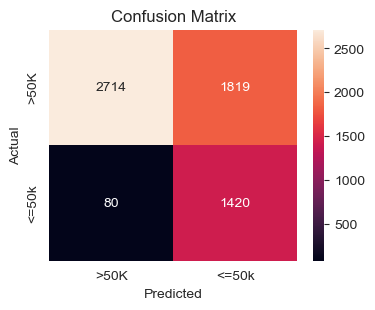

In [122]:
from matplotlib import pyplot as plt

actuals = clf.df_test['income']
cm = confusion_matrix(actuals, predictions)
plt.figure(figsize=(4,3))
ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax)
ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")
ax.set_title("Confusion Matrix")
ax.xaxis.set_ticklabels(['>50K', '<=50k'])
ax.yaxis.set_ticklabels(['>50K', '<=50k'])
plt.show()

In [118]:
cm

array([[2714, 1819],
       [  80, 1420]])

In [120]:
print(classification_report(actuals, predictions))

              precision    recall  f1-score   support

       <=50K       0.97      0.60      0.74      4533
        >50K       0.44      0.95      0.60      1500

    accuracy                           0.69      6033
   macro avg       0.70      0.77      0.67      6033
weighted avg       0.84      0.69      0.71      6033

